In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
data = pd.read_csv('Health_insurance.csv')

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
cnt_sex=data['sex'].value_counts().to_frame()
cnt_smoker=data["smoker"].value_counts().to_frame()
cnt_reg=data['region'].value_counts().to_frame()

<AxesSubplot:ylabel='sex'>

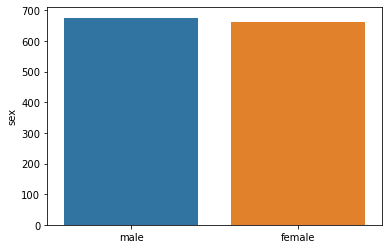

In [9]:
sns.barplot(data=cnt_sex,x=cnt_sex.index,y='sex')

<AxesSubplot:ylabel='smoker'>

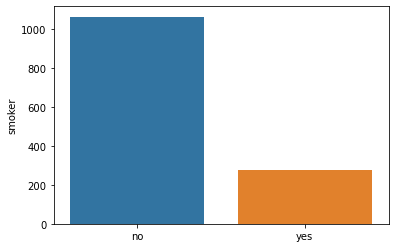

In [10]:
sns.barplot(data=cnt_smoker,x=cnt_smoker.index,y='smoker')

<AxesSubplot:xlabel='smoker', ylabel='charges'>

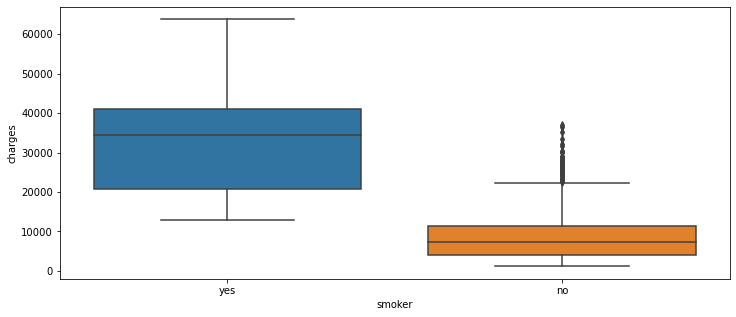

In [11]:
plt.figure(figsize=(12,5))
sns.boxplot(data=data,x='smoker',y='charges')

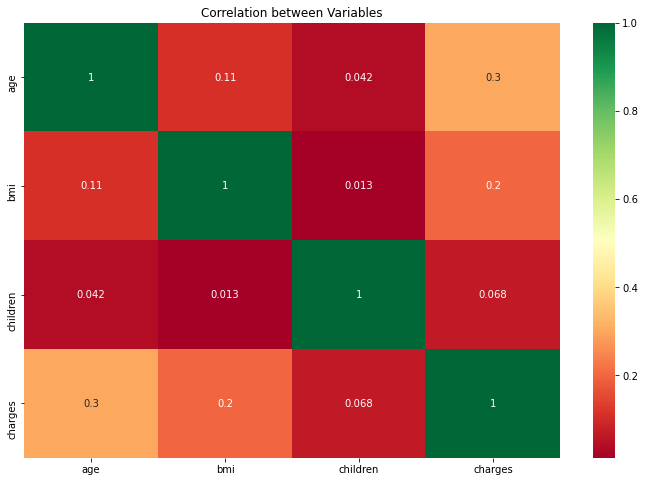

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

In [13]:
from sklearn.preprocessing import  LabelEncoder
le=LabelEncoder()

In [14]:
data.iloc[:,1]=le.fit_transform(data.iloc[:,1])
data.iloc[:,4]=le.fit_transform(data.iloc[:,4])
data.iloc[:,5]=le.fit_transform(data.iloc[:,5])

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data[["bmi","charges"]]=sc.fit_transform(data[["bmi","charges"]])

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=25)

In [19]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [20]:
model.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred=model.predict(X_test)

In [22]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7575797365475676

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.23356484567320807